# A/B TESTING: ONLINE ADVERTISING CAMPAIGN

#### SCENARIO:A digital marketing team is running two different Facebook ads to see which one gets more clicks
Ad A: Simple text and Image

Ad B: Includes a video

GOAL: Does the video ad increase click through rates (CTR)?

In [3]:
# Generate 8000 AD impressions with random click probabilities
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

#Set seed for reproducibility
np.random.seed(42)

#Generate 8000 samples
n=8000
groups=np.random.choice(['A','B'],size =n, p=[0.5,0.5]) 
clicks= np.where(groups=='A',
                np.random.binomial(1,0.03,n),   #3% CTR for A- Basic Ad
                np.random.binomial(1,0.05,n)) # 5% CTR for B -Video Ad

#Create DataFrame
df=pd.DataFrame({'Ad Version': groups, 'Clicked':clicks})
print(df.head())

  Ad Version  Clicked
0          A        0
1          B        0
2          B        0
3          B        0
4          A        0


In [7]:
# Perform Chi- square test to check if the CTR difference is statistically sign

#Create a contingency table
contingency_table=pd.crosstab(df['Ad Version'],df['Clicked'])
print(contingency_table)

#Perform chi-square test
chi2, p_value,dof,expected= stats.chi2_contingency(contingency_table)

print(f"Chi-Square statistic:{chi2: .2f}")
print(f"P_value: {p_value: .4f}")

# Interpret the p-value
if p_value < 0.05:
    print("Conclusion: Video ads work better (statistically significant).")
else:
    print("Conclusion: No significant difference; video ads have no advantage.")

Clicked        0    1
Ad Version           
A           3933  113
B           3726  228
Chi-Square statistic: 42.60
P_value:  0.0000
Conclusion: Video ads work better (statistically significant).


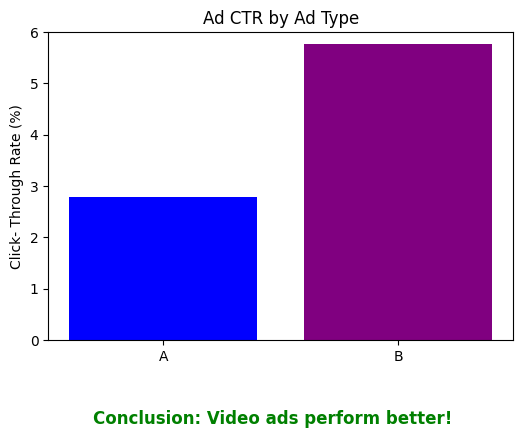

In [13]:
# Visualize the results

#Calculate the CTR per group
ctr=df.groupby('Ad Version')['Clicked'].mean()

#Plot
plt.figure(figsize=(6,4))
plt.bar(ctr.index, ctr.values*100, color=['blue','purple'])
plt.ylabel('Click- Through Rate (%)')
plt.title('Ad CTR by Ad Type')
plt.ylim(0,6)


# Add interpretation based on p-value
if p_value < 0.05:
    conclusion_text = "Conclusion: Video ads perform better!"
    color = "green"
else:
    conclusion_text = "Conclusion: No significant advantage of video ads."
    color = "red"



# Add conclusion as a footnote
plt.figtext(0.5, -0.1, conclusion_text, fontsize=12, color=color, ha='center', weight='bold')
plt.show()